In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plot.band_plot import line_bar_plot

In [4]:
epsilon_values = [0.02, 0.04, 0.06, 0.08, 0.1]

In [5]:
file_dir = '../results/self_distance/epsilon_{}.csv'

In [6]:
df_list = [pd.read_csv(file_dir.format(epsilon)) for epsilon in epsilon_values]

In [7]:
for index, epsilon in enumerate(epsilon_values):
    df_list[index]['epsilon'] = epsilon

In [8]:
df_zero = pd.read_csv('../results/none/epsilon_0.0.csv')
df_zero['epsilon'] = 0.0

In [9]:
df_list.append(df_zero)

In [10]:
concat_df = pd.concat(df_list, axis=0)

In [11]:
concat_df['recall_percentage'] = concat_df['recall_count'] / np.minimum(concat_df['num_possible'], concat_df['k'])

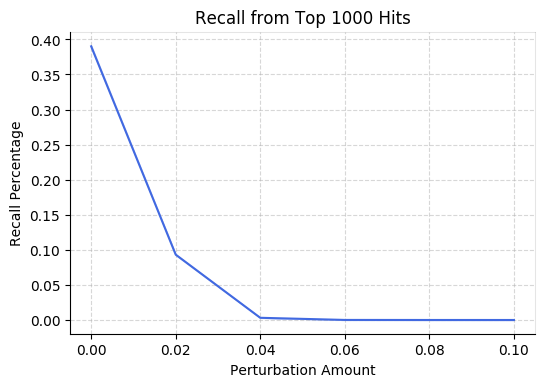

In [24]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df[concat_df['k'] == 1000],
                        use_bootstrap=False,
                        color='royalblue',
                        title='Recall from Top 1000 Hits',
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount')
plt.savefig('recall1000.pdf')

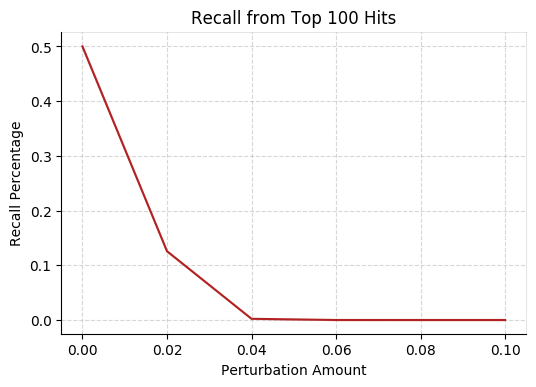

In [25]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df[concat_df['k'] == 100],
                        use_bootstrap=False,
                        color='firebrick',
                        title='Recall from Top 100 Hits',
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount')
plt.savefig('recall100.pdf')

/homes/gws/psturm/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/homes/gws/psturm/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


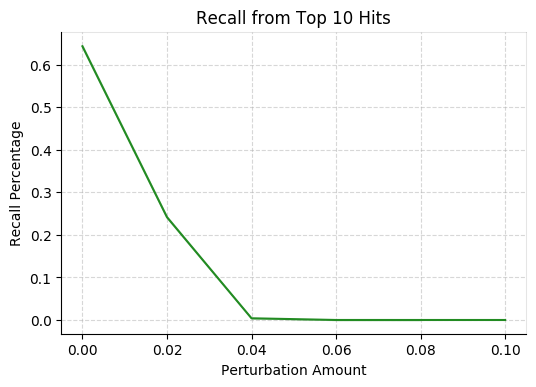

In [26]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df[concat_df['k'] == 10],
                        use_bootstrap=False,
                        color='forestgreen',
                        title='Recall from Top 10 Hits',
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount')
plt.savefig('recall10.pdf')

In [ ]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df[concat_df['k'] == 1],
                        use_bootstrap=False,
                        color='darkorange',
                        title='Recall from Top Hit',
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount')
plt.savefig('recall1.pdf')